# Project 4, APS1070 Fall 2023
#### **Linear Regression -  14 points**
**Deadline: Dec 1st, 23:00**


## Part 1 - Getting Started [2 marks]

In this project, we are going to design a mathematical model that predicts the number of shares on social networks.

For this purpose, we are going to use a dataset containing 39,644 instances, where each instance is a set of 61 heterogeneous features about articles published by Mashable in a period of two years. Our goal is to use these features to predict the `shares` column, which is the number of shares of an article in social networks. We will make our predictions by implementing linear regression.

The dataset has been sourced from the Machine Learning Repository of University of California, Irvine [Online News Popularity Data Set (UC Irvine)](https://archive.ics.uci.edu/dataset/332/online+news+popularity).
The UCI page mentions the following publication as the original source of the data set:

*K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence, September, Coimbra, Portugal*

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(
    filepath_or_buffer='/content/OnlineNewsPopularity.csv',
    index_col=0
)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[1.5]**
*   Using `train_test_split` from Sklearn, split the dataset into training and validation sets ($80\%$ training, $20\%$ validation). When splitting, set `random_state=1`. **[0.5]**
*   Keep the numerical features only. Then, standardize the data **manually** according to the same method as `StandardScaler` from sklearn, but you may not directly use `StandardScaler'. **[0.5]**
*   Insert a first column of all $1$s in both the training and validation data sets.**[0.5]**
3. Explain why we should not insert the column of $1$s prior to standardization. **[0.5]**

In [2]:
from sklearn.model_selection import train_test_split
numerical_df = df.select_dtypes(include=[np.number])

train_df, val_df = train_test_split(numerical_df, test_size=0.2, random_state=1)
cols_to_standardize = train_df.columns[train_df.columns != 'shares']

train_df_standardized = train_df.copy()
train_df_standardized[cols_to_standardize] = (train_df[cols_to_standardize] - train_df[cols_to_standardize].mean()) / train_df[cols_to_standardize].std()
val_df_standardized = val_df.copy()
val_df_standardized[cols_to_standardize] = (val_df[cols_to_standardize] - train_df[cols_to_standardize].mean()) / train_df[cols_to_standardize].std()

train_df_standardized.insert(0, 'Bias', 1)
val_df_standardized.insert(0, 'Bias', 1)

#train_df_standardized.head(), val_df_standardized.head()

Since a column of 1s has a constant value, its standard deviation would be 0, and thus the standardization process (which involves dividing by the standard deviation) would be mathematically invalid or undefined.

## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note: You should use scipy.linalg.inv to perform the inversion, as numpy.linalg.inv may caue an error.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [ ]:
from scipy.linalg import inv
from sklearn.metrics import mean_squared_error

X_train = train_df_standardized.drop('shares', axis=1).values
y_train = train_df_standardized['shares'].values
X_val = val_df_standardized.drop('shares', axis=1).values
y_val = val_df_standardized['shares'].values

weights = inv(X_train.T @ X_train) @ X_train.T @ y_train

train_predictions = X_train @ weights
val_predictions = X_val @ weights

rmse_train = mean_squared_error(y_train, train_predictions, squared=False)
rmse_val1 = mean_squared_error(y_val, val_predictions, squared=False)

print("RMSE on Training Set:", rmse_train)
print("RMSE on Validation Set:", rmse_val1)

RMSE on Training Set: 12166.121622454279
RMSE on Validation Set: 8267.220259888227


## Part 3 - Full Batch Gradient Descent [4 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data.

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges.

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you calculated in the previous part.

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).
  Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[1]**

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[1]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

* Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[0.5]**

--- Total Training Time: 2.184654951095581 (s) ---


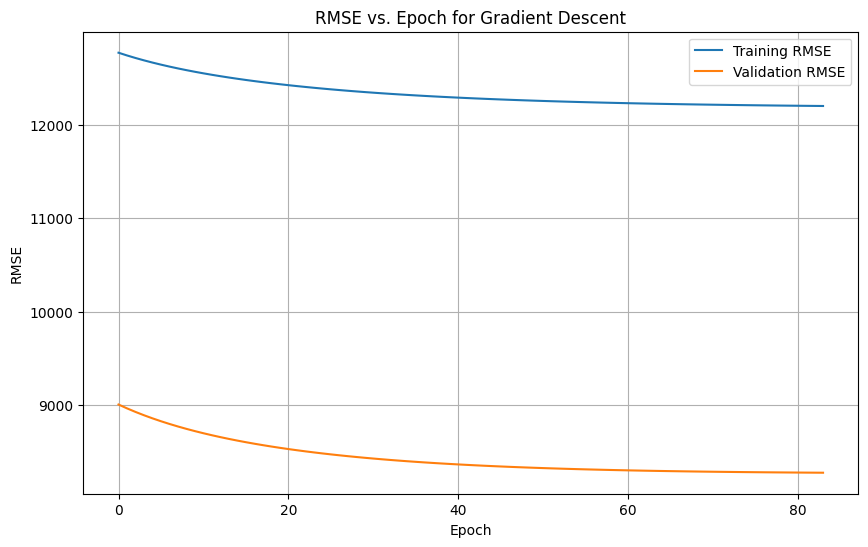

In [ ]:
import time
import matplotlib.pyplot as plt

start_time = time.time() ## Records current time
np.random.seed(2)

weights_direct_solution = inv(X_train.T @ X_train) @ X_train.T @ y_train
val_predictions_direct = X_val @ weights_direct_solution
rmse_val_direct_solution = mean_squared_error(y_val, val_predictions_direct, squared=False)

alpha = 0.01
weights = np.random.uniform(low=-0.001, high=0.001, size=X_train.shape[1])
convergence_threshold = 1.001 * rmse_val_direct_solution
train_rmse, val_rmse = [], []

epoch = 0
while True:
    train_predictions = X_train @ weights
    val_predictions = X_val @ weights

    rmse_train = mean_squared_error(y_train, train_predictions, squared=False)
    rmse_val = mean_squared_error(y_val, val_predictions, squared=False)
    train_rmse.append(rmse_train)
    val_rmse.append(rmse_val)

    if rmse_val <= convergence_threshold:
        break

    gradient = 2/X_train.shape[0] * X_train.T @ (train_predictions - y_train)
    weights -= alpha * gradient
    epoch += 1

total_training_time = time.time() - start_time
print("--- Total Training Time: %s (s) ---" % total_training_time)

# Plotting RMSE vs. Epoch
plt.figure(figsize=(10, 6))
plt.plot(train_rmse, label='Training RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE vs. Epoch for Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

There is no direct evidence of overfitting or underfitting in the provided plot. The model seems to be learning well as the RMSE on both sets converge to that of direct solution from part 2.

**Differences between Epoch and iteration**
- Epoch: An epoch refers to one complete pass through the entire training dataset. In full batch gradient descent, as implemented here, each epoch consists of a single iteration where the gradient is computed using the entire dataset.
- Iteration: An iteration is the number of times the weights are updated. In stochastic gradient descent (SGD) or mini-batch gradient descent, each iteration involves updating weights based on a single data point (SGD) or a subset of the data (mini-batch), making several iterations per epoch.
- In full batch gradient descent, the terms 'epoch' and 'iteration' are often used interchangeably as each epoch contains only one iteration. However, in SGD or mini-batch gradient descent, these terms are distinct.

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are:
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays:
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes:
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged.
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`.

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

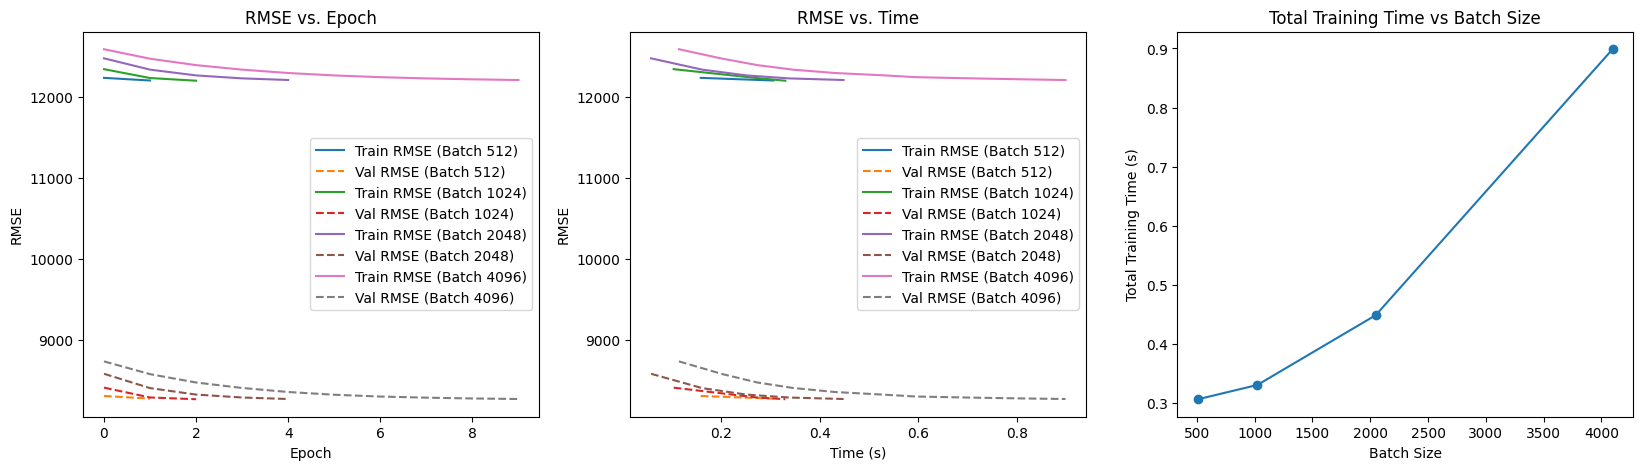

In [ ]:
def mini_batch_gradient_descent(X_train, y_train, X_val, y_val, batch_size, learning_rate, CT):

    N = len(X_train)
    weights = np.random.uniform(low=-0.001, high=0.001, size=X_train.shape[1])
    train_rmse = []
    val_rmse = []
    times = []
    start_time = time.time()

    # Early stopping parameters
    best_val_rmse = float('inf')
    epochs_without_improvement = 0
    max_epochs_without_improvement = 2

    epoch = 0
    while True:
      shuffled_indices = np.random.permutation(X_train.shape[0])
      X_train_shuffled = X_train[shuffled_indices]
      y_train_shuffled = y_train[shuffled_indices]

      for i in range(0, X_train.shape[0], batch_size):
          X_batch = X_train_shuffled[i:i + batch_size]
          y_batch = y_train_shuffled[i:i + batch_size]

          gradient = -2/X_batch.shape[0] * X_batch.T.dot(y_batch - X_batch.dot(weights))
          weights -= learning_rate * gradient

      train_pred = X_train.dot(weights)
      val_pred = X_val.dot(weights)
      rmse_train = mean_squared_error(y_train, train_pred, squared=False)
      rmse_val = mean_squared_error(y_val, val_pred, squared=False)

      train_rmse.append(rmse_train)
      val_rmse.append(rmse_val)
      times.append(time.time() - start_time)

      if rmse_val <= CT:
          break

      # Check for early stopping
      if rmse_val < best_val_rmse:
          best_val_rmse = rmse_val
          epochs_without_improvement = 0
      else:
          epochs_without_improvement += 1

      if epochs_without_improvement >= max_epochs_without_improvement:
          break

      epoch += 1

    return weights, train_rmse, val_rmse, times

# Parameters
batch_sizes = [512,1024,2048,4096]
alpha = 0.01
CT = 1.001 * rmse_val

results = {}

for batch_size in batch_sizes:
    result = mini_batch_gradient_descent(X_train, y_train, X_val, y_val, batch_size, alpha, CT)
    results[batch_size] = result

plt.figure(figsize=(20, 5))

# Plot 1: RMSE vs Epoch
plt.subplot(1, 3, 1)
for batch_size, result in results.items():
    plt.plot(result[1], label=f'Train RMSE (Batch {batch_size})')
    plt.plot(result[2], '--', label=f'Val RMSE (Batch {batch_size})')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE vs. Epoch')
plt.legend()

# Plot 2: RMSE vs Time
plt.subplot(1, 3, 2)
for batch_size, result in results.items():
    plt.plot(result[3], result[1], label=f'Train RMSE (Batch {batch_size})')
    plt.plot(result[3], result[2], '--', label=f'Val RMSE (Batch {batch_size})')
plt.xlabel('Time (s)')
plt.ylabel('RMSE')
plt.title('RMSE vs. Time')
plt.legend()

# Plot 3: Total Training Time vs Batch Size
plt.subplot(1, 3, 3)
total_training_times = [result[3][-1] for result in results.values()]
plt.plot(batch_sizes, total_training_times, marker='o')
plt.xlabel('Batch Size')
plt.ylabel('Total Training Time (s)')
plt.title('Total Training Time vs Batch Size')
plt.show()

**First Plot**
- The RMSE for both training and validation decreases as the number of epochs increases, indicating that the model is learning from the data over time.
- The rate of RMSE decrease slows down for larger batch sizes, suggesting that smaller batches lead to faster learning per epoch. This could be due to the fact that smaller batches allow the model to update its weights more frequently.

**Second Plot**

- Smaller batch sizes appear to decrease the RMSE more rapidly in the initial phase of training with respect to time, which implies they could be computationally more efficient in the short term.
- For larger batch sizes, the decrease in RMSE is more gradual over time, indicating a slower learning process. This is expected because larger batches require more computation for each gradient update.

**Third Plot**

- As batch size increases, the total training time also increases, but at a growing rate.
- The sharp increase in training time for the largest batch sizes might be due to the higher computational cost of processing large batches and the diminishing efficiency of learning as the batch size grows.


## Part 5 - Gradient Descent Learning Rate [3 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batch sizes that do not converge with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batch size. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[1]**

2. Select the best batch size based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD.
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[1]**

In [ ]:
def find_convergent_learning_rate(batch_size, initial_alpha, CT, max_trials=5):

    for i in range(max_trials):
        alpha = initial_alpha / (10 ** i)
        result = mini_batch_gradient_descent(X_train, y_train, X_val, y_val, batch_size, alpha, CT)
        if result[2][-1] <= CT:
            return {
                "batch_size": batch_size,
                "learning_rate": alpha,
                "final_weights": result[0],
                "train_rmse": result[1][-1],
                "val_rmse": result[2][-1]
            }
    return None

# Parameters
batch_sizes = [2,4,8]
alpha = 0.01
CT = 1.001 * rmse_val

convergence_results = []
for batch_size in batch_sizes:
    result = find_convergent_learning_rate(batch_size, alpha, CT)
    if result:
        convergence_results.append(result)

print("Batch Size | Learning Rate | Training RMSE | Validation RMSE")
for result in convergence_results:
    print(f"{result['batch_size']} | {result['learning_rate']} | {result['train_rmse']} | {result['val_rmse']}")


Batch Size | Learning Rate | Training RMSE | Validation RMSE
2 | 1e-05 | 12205.68772734207 | 8279.521853682632
4 | 0.0001 | 12213.957122644164 | 8265.982206290608
8 | 0.001 | 12379.130806677573 | 8280.534026115307


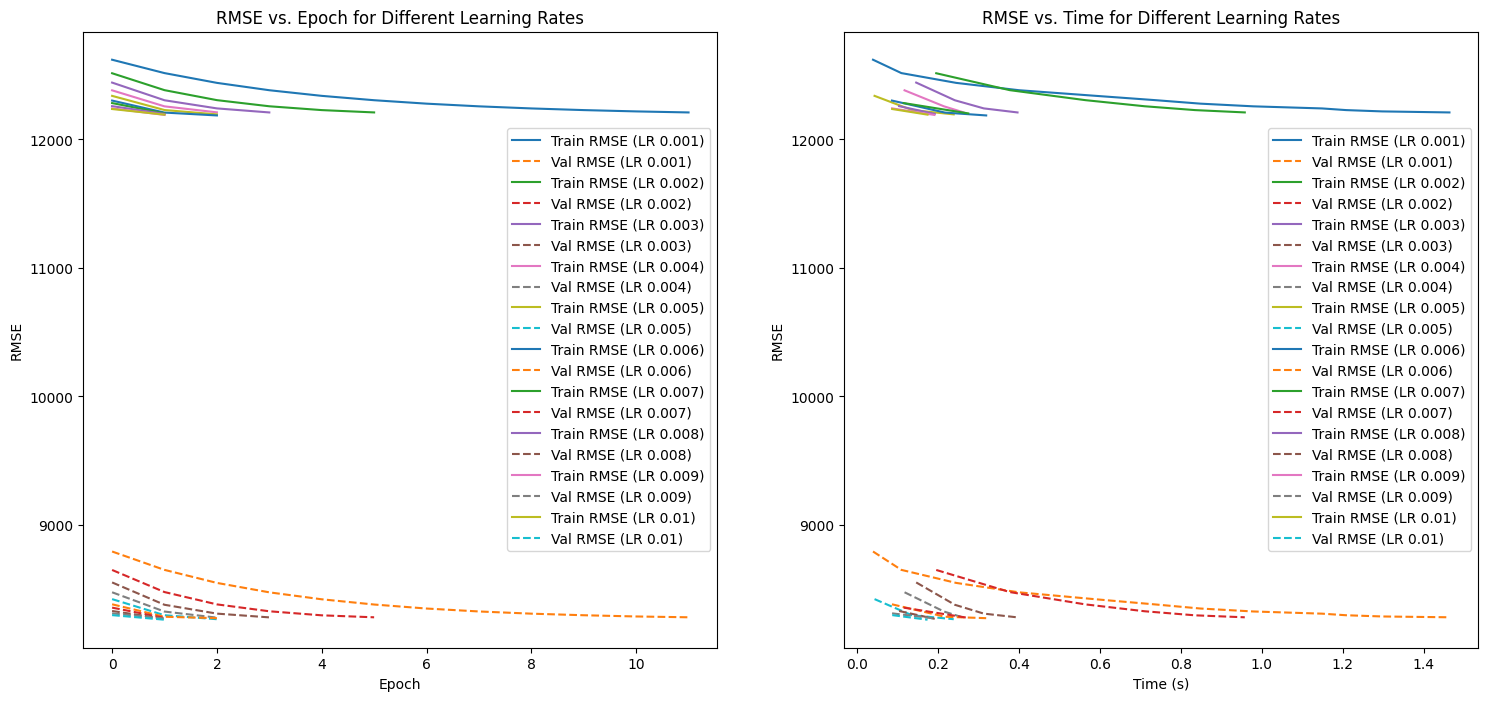

In [ ]:
learning_rates = [x / 1000 for x in range(1, 11)]

sweep_results = {}

for learning_rate in learning_rates:
    result = mini_batch_gradient_descent(X_train, y_train, X_val, y_val, 512 ,learning_rate, CT)
    sweep_results[learning_rate] = result

# Plot RMSE vs. Epoch
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
for learning_rate, result in sweep_results.items():
    plt.plot(result[1], label=f'Train RMSE (LR {learning_rate})')
    plt.plot(result[2], '--', label=f'Val RMSE (LR {learning_rate})')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE vs. Epoch for Different Learning Rates')
plt.legend()

# Plot RMSE vs. Time
plt.subplot(1, 2, 2)
for learning_rate, result in sweep_results.items():
    plt.plot(result[3], result[1], label=f'Train RMSE (LR {learning_rate})')
    plt.plot(result[3], result[2], '--', label=f'Val RMSE (LR {learning_rate})')
plt.xlabel('Time (s)')
plt.ylabel('RMSE')
plt.title('RMSE vs. Time for Different Learning Rates')
plt.legend()
plt.show()


- From the plot to the left, we observe a consistent decrease in the RMSE for both the training and validation sets as the number of epochs increases. This trend indicates that the model is effectively learning and generalizing from the training data across all tested learning rates. Notably, the higher learning rates, especially those approaching 0.01, appear to yield a marginally lower RMSE by the end of the training process.
- Plot to the right demonstrates that the training time for the model is generally lower for higher learning rates. Despite this minor increase in training time, higher learning rates result in a more rapid decrease in validation RMSE, although the differences between the rates are subtle. The plot indicates that within the selected range of learning rates, adjustments do not significantly impact the computational demands of the model.
- Main takeaway: The model benefits from higher learning rates up to a point, but there is a diminishing return as the learning rate approaches 0.01 in this scenario; The learning rate should be chosen carefully to balance the speed of convergence with the stability of the learning process, and within the range tested, rates closer to 0.01 may offer a slight advantage in performance without compromising convergence time.





